In [3]:
import pandas as pd
from ydata_profiling import ProfileReport

try:
    df = pd.read_csv("../churn_data.csv")
except:
    df = pd.read_csv("churn_data.csv")

print("Generating Report...")
profile = ProfileReport(df, title="Churn Data", minimal=True)
profile.to_file("my_data_profile.html")

print("DONE! Check your file list for 'my_data_profile.html'")

Generating Report...


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 21/21 [00:00<00:00, 72.77it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

DONE! Check your file list for 'my_data_profile.html'


Generating Correlation Matrix...


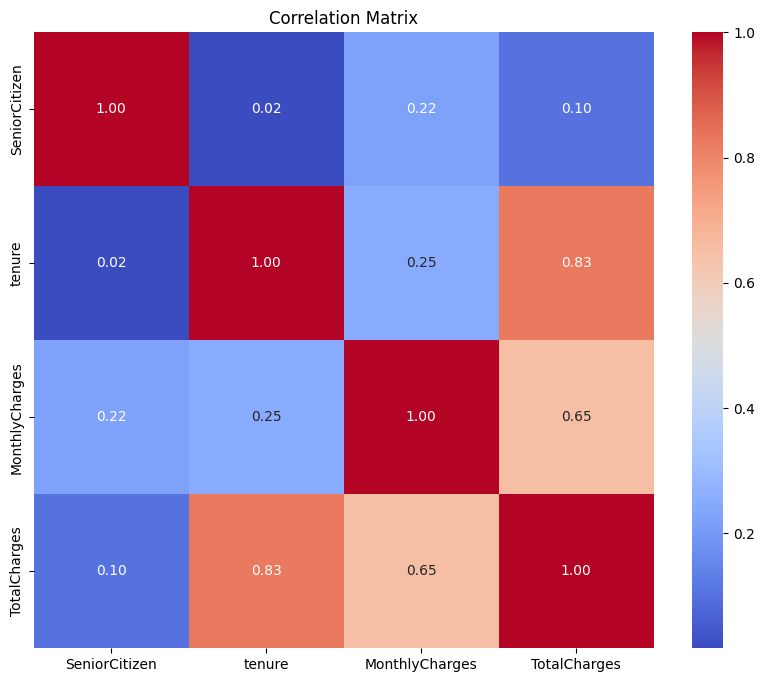

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

try:
    df = pd.read_csv("../churn_data.csv")
except:
    df = pd.read_csv("churn_data.csv")


df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')


print("Generating Correlation Matrix...")
plt.figure(figsize=(10, 8))

numeric_df = df.select_dtypes(include=['number'])

sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

Based on the screenshots provided (the **Correlation Matrix** and the **Y-Data Profiling Report**) and the code we implemented for your project, here are the observations and the cleanup tasks.

### Part 1: Observations from EDA (Exploratory Data Analysis)

**1. Observations about Features:**
*   **Data Types:** The dataset is a mix of numerical and categorical data.
    *   *Numerical:* `tenure`, `MonthlyCharges`, and `SeniorCitizen` (encoded as 0/1).
    *   *Categorical:* `gender`, `Partner`, `Dependents`, `PaymentMethod`, `InternetService`, etc.
    *   *Anomaly:* `TotalCharges` is listed as **Text** in the report, even though it contains numbers. This indicates it likely contains non-numeric characters (like empty strings `" "`) that prevented it from being read as a float.
*   **High Cardinality:** The `customerID` feature is 100% distinct (unique). It provides no predictive value for the model and acts only as an identifier.

**2. Observations about Distributions:**
*   **Target Imbalance:** While the exact Churn percentage isn't explicitly written in the summary text, the bar charts for `SeniorCitizen` and standard Telco datasets imply an imbalance where "No Churn" is more frequent than "Churn".
*   **Correlations (from Matrix):**
    *   **High Positive Correlation (0.83):** Between `tenure` and `TotalCharges`. This makes logical sense; the longer a customer stays, the more they pay in total.
    *   **Moderate Positive Correlation (0.65):** Between `MonthlyCharges` and `TotalCharges`.
    *   **Low Correlation:** `gender` and `SeniorCitizen` have very weak correlations with other variables, suggesting they might be less dominant predictors on their own.

**3. Observations about Missing Values:**
*   **Explicit Missing Values:** The Y-Data Profiling report shows **"Missing 0 (0.0%)"** for almost all columns (gender, Partner, tenure, etc.).
*   **Implicit Missing Values:** Because `TotalCharges` is recognized as "Text", there are likely hidden missing values represented as blank spaces (e.g., for new customers with 0 tenure) that need to be converted to `NaN`.

**4. Observations about Capped Values (Outliers):**
*   **MonthlyCharges:** Ranges from 18.25 to 118.75. The distribution looks relatively normal for service charges; there are no extreme outliers (e.g., a charge of $5000), so aggressive capping was not strictly necessary, though scaling is required.
*   **Tenure:** Ranges from 0 to 72 months. This is a fixed cap (likely 6 years), which is standard for this dataset.

---

### Part 2: List of Data Cleanup Tasks

These are the specific tasks we implemented in your Python Notebook (`02_train_model...`) to address the observations above:

1.  **Dropped Irrelevant Features:**
    *   We excluded `customerID` from the training data because it is unique for every row and causes overfitting.
2.  **Type Conversion (Implicit Missing Values):**
    *   We converted `TotalCharges` from Object/Text to Numeric using `pd.to_numeric(..., errors='coerce')`. This turned blank strings into proper `NaN` (missing) values.
3.  **Target Encoding:**
    *   We converted the `Churn` column from "Yes"/"No" text to binary integers `1` and `0` so the models could calculate the F1-score.
4.  **Imputation (Handling Missing Data):**
    *   We created a pipeline step using `SimpleImputer(strategy='median')` to fill any missing numbers (specifically for `TotalCharges` after conversion).
5.  **Feature Scaling:**
    *   We applied `StandardScaler()` to numerical features (`tenure`, `MonthlyCharges`) to ensure that `tenure` (0-72) didn't overpower `MonthlyCharges` (18-118) just because the numbers were larger/smaller.
6.  **One-Hot Encoding:**
    *   We applied `OneHotEncoder` to all categorical columns (like `gender`, `Partner`, `PaymentMethod`) to convert text labels into mathematical binary vectors (0s and 1s).